<a href="https://colab.research.google.com/github/bharaniakella/Akellian_DL/blob/main/ANN_classify_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [453]:
# import libraries
import torch
import torch.nn as nn

import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [454]:
import pandas as pd
import numpy as np

In [455]:
dia=pd.read_csv('diabetes.csv')
dia.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [456]:
from sklearn.preprocessing import StandardScaler
data=torch.tensor(dia[dia.columns[0:8]].values).float()
data.shape

# Convert tensor to numpy array
data_np = data.numpy()

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler on data and transform data
data_normalized_np = scaler.fit_transform(data_np)

# Convert numpy array back to tensor
data_normalized = torch.tensor(data_normalized_np)
data_normalized

tensor([[ 0.6399,  0.8483,  0.1496,  ...,  0.2040,  0.4685,  1.4260],
        [-0.8449, -1.1234, -0.1605,  ..., -0.6844, -0.3651, -0.1907],
        [ 1.2339,  1.9437, -0.2639,  ..., -1.1033,  0.6044, -0.1056],
        ...,
        [ 0.3430,  0.0033,  0.1496,  ..., -0.7352, -0.6852, -0.2758],
        [-0.8449,  0.1598, -0.4707,  ..., -0.2402, -0.3711,  1.1707],
        [-0.8449, -0.8730,  0.0462,  ..., -0.2021, -0.4738, -0.8714]])

In [457]:
labels=torch.tensor(dia[dia.columns[8]],dtype=float)
labels = labels.view(-1, 1)
labels.shape

torch.Size([768, 1])

In [458]:
ann_dia=nn.Sequential(
    nn.Linear(8,64),
    nn.ReLU(),
    nn.Linear(64,64),
    nn.ReLU(),
    nn.Linear(64,1)
)
lr=0.9
loss_fun=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(ann_dia.parameters(),lr)

In [459]:
num_epochs=500
losses=torch.zeros(num_epochs)

In [460]:
for epochi in range(num_epochs):
  yhat=ann_dia(data_normalized)

  loss=loss_fun(yhat,labels)
  losses[epochi]=loss

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


predictions=ann_dia(data_normalized)
total_acc=100*torch.mean(((predictions>0)==labels).float())

In [461]:
total_acc

tensor(91.0156)

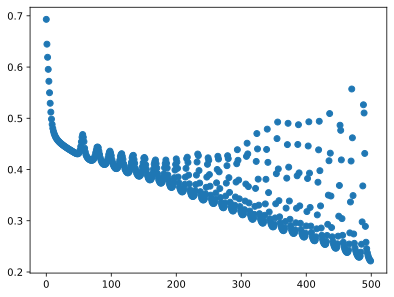

In [462]:
plt.plot(losses.detach(),'o')
plt.show()